# Data Challenge 01: Immigration to the USA

#### Dataset: provided on Google Drive

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error

### Loading and Viewing Dataset

In [2]:
train_features = pd.read_csv('train_x_region.csv')
train_labels = pd.read_csv('train_y.csv')

test_features = pd.read_csv('test_x_region.csv')

In [3]:
train_features

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Region
0,2016,France,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,74264176,Europe & Central Asia
1,2018,Venezuela,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,29174393,Latin America & Caribbean
2,2019,Costa Rica,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,4657652,Latin America & Caribbean
3,2019,Bolivia,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,10286729,Latin America & Caribbean
4,2016,Nicaragua,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,5994622,Latin America & Caribbean
...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,Philippines,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,99766788,East Asia & Pacific
238,2018,United Kingdom,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,73917008,Europe & Central Asia
239,2017,Ethiopia,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,78815294,Sub-Saharan Africa
240,2019,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,1260422331,South Asia


In [4]:
train_features.shape

(242, 12)

In [5]:
desc = train_features.describe()
desc

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate
count,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,242.000000,2.420000e+02
mean,2016.954545,58.037190,5.895496,2.884285,1.172189,0.882891,0.538545,0.258015,0.188854,8.774480e+07
std,1.435328,41.147073,1.051886,2.456517,0.307805,0.279914,0.177976,0.188388,0.117228,2.584785e+08
min,2015.000000,1.000000,3.006000,0.071200,0.107060,0.267000,0.013000,0.001000,0.000000,3.011010e+05
25%,2016.000000,23.000000,5.183750,0.982750,0.975545,0.707388,0.449185,0.083025,0.099000,7.347570e+06
50%,2017.000000,51.000000,5.946500,1.327460,1.234435,0.874320,0.546675,0.211095,0.162460,1.369083e+07
75%,2018.000000,88.750000,6.743750,5.377166,1.430750,1.021648,0.642162,0.427625,0.266100,7.318332e+07
max,2019.000000,156.000000,7.769000,7.590000,1.616463,1.558231,0.952770,0.635423,0.519120,1.567995e+09


In [6]:
train_info = train_features.info()
train_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           242 non-null    int64  
 1   Country                        242 non-null    object 
 2   Happiness Rank                 242 non-null    int64  
 3   Happiness Score                242 non-null    float64
 4   Economy (GDP per Capita)       242 non-null    float64
 5   Family                         242 non-null    float64
 6   Health (Life Expectancy)       242 non-null    float64
 7   Freedom                        242 non-null    float64
 8   Trust (Government Corruption)  242 non-null    float64
 9   Generosity                     242 non-null    float64
 10  Population Estimate            242 non-null    int64  
 11  Region                         242 non-null    object 
dtypes: float64(7), int64(3), object(2)
memory usage: 2

In [7]:
test_info = test_features.info()
test_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Year                           61 non-null     int64  
 1   Country                        61 non-null     object 
 2   Happiness Rank                 61 non-null     int64  
 3   Happiness Score                61 non-null     float64
 4   Economy (GDP per Capita)       61 non-null     float64
 5   Family                         61 non-null     float64
 6   Health (Life Expectancy)       61 non-null     float64
 7   Freedom                        61 non-null     float64
 8   Trust (Government Corruption)  61 non-null     float64
 9   Generosity                     61 non-null     float64
 10  Population Estimate            61 non-null     int64  
 11  Region                         61 non-null     object 
dtypes: float64(7), int64(3), object(2)
memory usage: 5.8

In [8]:
train_labels

,Immigration to the United States
0,5473.0
1,11481.0
2,2466.0
3,1425.0
4,3397.0
...,...
237,46542.0
238,11867.0
239,15678.0
240,51139.0


To begin with, I loaded the data from the provided CSV files into three dataframes, one with the training data, one with the training labels or targets, and one with the test data. From looking at this data, we see that there are 242 rows and 12 features. None of the rows are missing data, and two of the features are strings: Country and Region.

Now, I am going to add the features and labels together into one dataframe to get the correlation matrix for the target we are trying to predict, which is 'Immigration to the United States'.

In [9]:
df = pd.concat((train_features, train_labels), axis=1)
corr = df.corr()
immigration_corr = corr['Immigration to the United States'].sort_values(ascending=False, key=abs)
immigration_corr

Immigration to the United States    1.000000
Population Estimate                 0.445795
Family                             -0.186854
Generosity                         -0.170803
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
Name: Immigration to the United States, dtype: float64

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


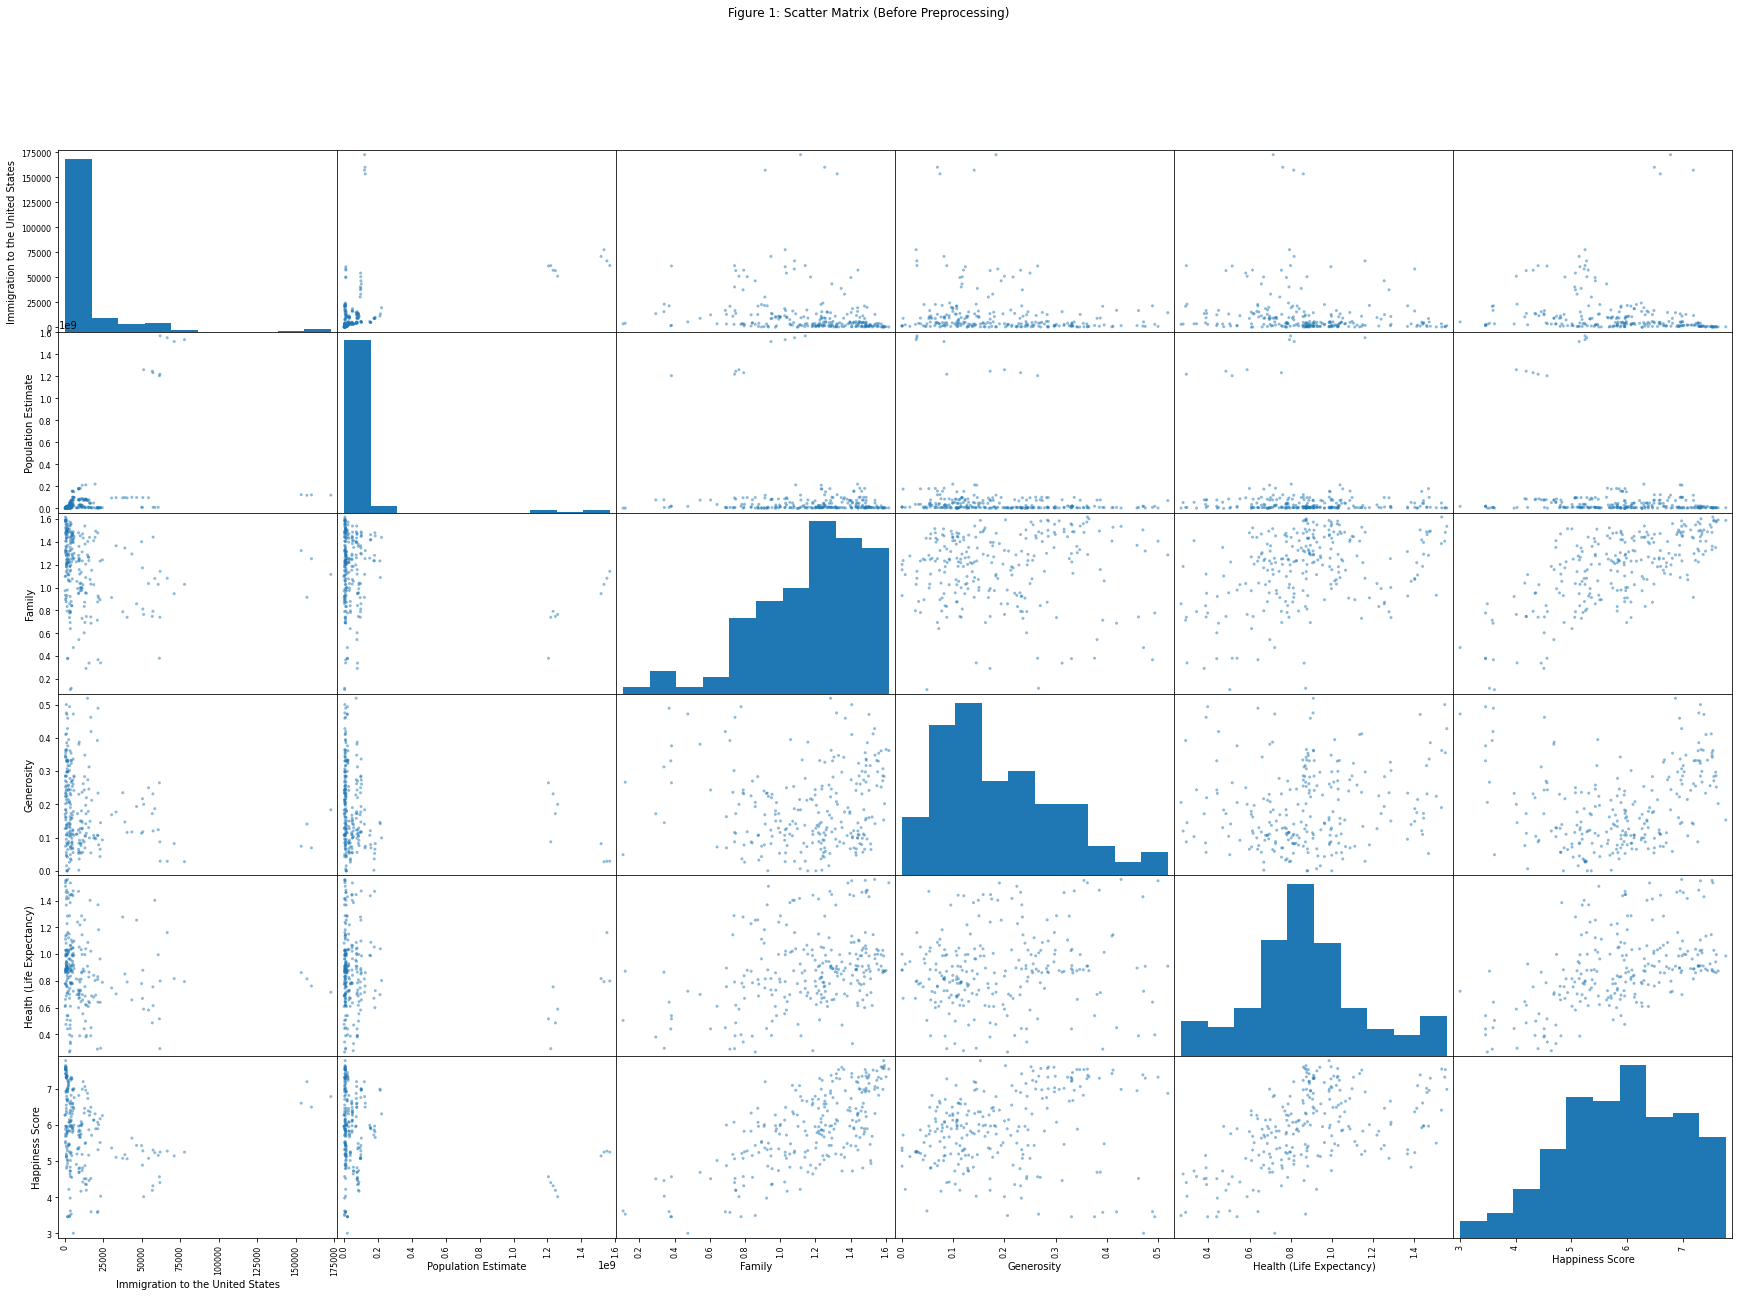

In [10]:
attributes = list(immigration_corr.head(6).keys())
scatter_matrix(df[attributes], figsize=(30, 20))
plt.suptitle("Figure 1: Scatter Matrix (Before Preprocessing)")
plt.show()

The feature with the highest correlation is Population Estimate. As we can see from the above values, this correlation is not very high to begin with, and the feature with the second-highest correlation does not score very high at all. On top of that, two of the dataset's features are missing because they are represented as strings: Country and Region. These features may be highly correlated to our target, so they should be included. To help with both of these things, below I do some feature engineering to find features that are more highly correlated and use one-hot encoding to include the string features.

### Data Preprocessing and Feature Engineering

In [11]:
df.Region.value_counts()

Latin America & Caribbean     87
Europe & Central Asia         81
East Asia & Pacific           31
Middle East & North Africa    25
Sub-Saharan Africa            13
South Asia                     5
Name: Region, dtype: int64

In [12]:
df.Country.value_counts()

Morocco      5
Russia       5
Ireland      5
Haiti        5
Egypt        5
            ..
Belgium      3
Venezuela    3
Taiwan       3
Hungary      2
Suriname     2
Name: Country, Length: 62, dtype: int64

I will begin with one-hot encoding. Specifically, I will encode the feature Region, seeing as there are only five regions compared to the 62 countries represented in the data.

In [13]:
enc = LabelBinarizer()
enc.fit(df['Region'])
transformed_op = enc.transform(df['Region'])
transformed_op_test = enc.transform(test_features['Region'])
transformed_op

array([[0, 1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 1]])

In [14]:
one_hot_df = pd.DataFrame(transformed_op)
df = pd.concat([df, one_hot_df], axis=1)
df.drop(['Region'], axis=1, inplace=True)

one_hot_df_test = pd.DataFrame(transformed_op_test)
test_features = pd.concat([test_features, one_hot_df_test], axis=1)
test_features.drop(['Region'], axis=1, inplace=True)

df

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Immigration to the United States,0,1,2,3,4,5
0,2016,France,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,74264176,5473.0,0,1,0,0,0,0
1,2018,Venezuela,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,29174393,11481.0,0,0,1,0,0,0
2,2019,Costa Rica,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,4657652,2466.0,0,0,1,0,0,0
3,2019,Bolivia,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,10286729,1425.0,0,0,1,0,0,0
4,2016,Nicaragua,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,5994622,3397.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,Philippines,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,99766788,46542.0,1,0,0,0,0,0
238,2018,United Kingdom,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,73917008,11867.0,0,1,0,0,0,0
239,2017,Ethiopia,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,78815294,15678.0,0,0,0,0,0,1
240,2019,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,1260422331,51139.0,0,0,0,0,1,0


In [15]:
df = df.rename(columns={ i: enc.classes_[i] for i in range(len(enc.classes_)) })

test_features = test_features.rename(columns={ i: enc.classes_[i] for i in range(len(enc.classes_)) })

df

,Year,Country,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,Immigration to the United States,East Asia & Pacific,Europe & Central Asia,Latin America & Caribbean,Middle East & North Africa,South Asia,Sub-Saharan Africa
0,2016,France,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,74264176,5473.0,0,1,0,0,0,0
1,2018,Venezuela,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,29174393,11481.0,0,0,1,0,0,0
2,2019,Costa Rica,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,4657652,2466.0,0,0,1,0,0,0
3,2019,Bolivia,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,10286729,1425.0,0,0,1,0,0,0
4,2016,Nicaragua,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,5994622,3397.0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,Philippines,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,99766788,46542.0,1,0,0,0,0,0
238,2018,United Kingdom,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,73917008,11867.0,0,1,0,0,0,0
239,2017,Ethiopia,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,78815294,15678.0,0,0,0,0,0,1
240,2019,India,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,1260422331,51139.0,0,0,0,0,1,0


In [16]:
corr = df.corr()
corr['Immigration to the United States'].sort_values(ascending=False, key=abs)

Immigration to the United States    1.000000
Population Estimate                 0.445795
Europe & Central Asia              -0.278405
South Asia                          0.263632
Family                             -0.186854
Generosity                         -0.170803
Latin America & Caribbean           0.169817
East Asia & Pacific                 0.155305
Health (Life Expectancy)           -0.147452
Happiness Score                    -0.134443
Happiness Rank                      0.126923
Middle East & North Africa         -0.083913
Sub-Saharan Africa                 -0.061984
Trust (Government Corruption)      -0.058378
Freedom                            -0.042866
Economy (GDP per Capita)           -0.030175
Year                               -0.017201
Name: Immigration to the United States, dtype: float64

As we can see, this added two features, Europe & Central Asia and South Asia, that are more correlated to our target than what was previously the second most correlated feature, Family.

To see if I could get more correlation like this, I also tried to do one hot encoding with Country, with the plan to drop all of the countries except the most correlated.

In [17]:
enc = LabelBinarizer()
enc.fit(df['Country'])
transformed_op = enc.transform(df['Country'])
one_hot_df = pd.DataFrame(transformed_op)
df = pd.concat([df, one_hot_df], axis=1)
df.drop(['Country'], axis=1, inplace=True)

transformed_op_test = enc.transform(test_features['Country'])
one_hot_df_test = pd.DataFrame(transformed_op_test)
test_features = pd.concat([test_features, one_hot_df_test], axis=1)
test_features.drop(['Country'], axis=1, inplace=True)

df

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,...,52,53,54,55,56,57,58,59,60,61
0,2016,32,6.478,6.559000,1.394880,1.005080,0.837950,0.465620,0.178080,74264176,...,0,0,0,0,0,0,0,0,0,0
1,2018,102,4.806,0.996000,1.469000,0.657000,0.133000,0.052000,0.056000,29174393,...,0,0,0,0,0,0,0,0,1,0
2,2019,12,7.167,1.034000,1.441000,0.963000,0.558000,0.093000,0.144000,4657652,...,0,0,0,0,0,0,0,0,0,0
3,2019,61,5.779,0.776000,1.209000,0.706000,0.511000,0.064000,0.137000,10286729,...,0,0,0,0,0,0,0,0,0,0
4,2016,48,5.992,6.107000,0.693840,0.895210,0.652130,0.465820,0.162920,5994622,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,2017,72,5.430,5.314665,0.857699,1.253918,0.468009,0.585215,0.193513,99766788,...,0,0,0,0,0,0,0,0,0,0
238,2018,11,7.190,1.244000,1.433000,0.888000,0.464000,0.082000,0.262000,73917008,...,0,0,0,0,0,0,1,0,0,0
239,2017,119,4.460,4.377271,0.339234,0.864669,0.353410,0.408843,0.312651,78815294,...,0,0,0,0,0,0,0,0,0,0
240,2019,140,4.015,0.755000,0.765000,0.588000,0.498000,0.085000,0.200000,1260422331,...,0,0,0,0,0,0,0,0,0,0


In [18]:
df = df.rename(columns={ i: enc.classes_[i] for i in range(len(enc.classes_)) })

test_features = test_features.rename(columns={ i: enc.classes_[i] for i in range(len(enc.classes_)) })

corr = df.corr()
immigration_corr = corr['Immigration to the United States'].sort_values(ascending=False, key=abs)
immigration_corr

Immigration to the United States    1.000000
Mexico                              0.780947
Population Estimate                 0.445795
China                               0.296674
Europe & Central Asia              -0.278405
                                      ...   
Egypt                              -0.005849
Ethiopia                            0.004684
Honduras                           -0.003792
United Kingdom                      0.002637
Guatemala                           0.001889
Name: Immigration to the United States, Length: 79, dtype: float64

Now, we see that the new most correlated feature is a country, Mexico, and the third most correlated is another country, China, so doing this one-hot encoding for Country is helpful even if there are enough countries that including them all might hinder the model. Seven out of the top ten most correlated features are from one-hot encoding the Region and Country features.

Next, I combine features to determine other helpful features for our dataset.

In [19]:
df['Population and Family'] = df['Population Estimate'] / df['Family']
df['Population and Happiness'] = df['Population Estimate'] / df['Happiness Rank']
df['Population and Health'] = df['Population Estimate'] / df['Health (Life Expectancy)']
df['Population and Freedom'] = df['Population Estimate'] / df['Freedom']

test_features['Population and Family'] = test_features['Population Estimate'] / test_features['Family']
test_features['Population and Happiness'] = test_features['Population Estimate'] / test_features['Happiness Rank']
test_features['Population and Health'] = test_features['Population Estimate'] / test_features['Health (Life Expectancy)']
test_features['Population and Freedom'] = test_features['Population Estimate'] / test_features['Freedom']

corr = df.corr()
immigration_corr = corr['Immigration to the United States'].sort_values(ascending=False, key=abs)
immigration_corr.head(25)

Immigration to the United States    1.000000
Mexico                              0.780947
Population and Happiness            0.454478
Population Estimate                 0.445795
Population and Freedom              0.421045
Population and Family               0.413199
Population and Health               0.406748
China                               0.296674
Europe & Central Asia              -0.278405
South Asia                          0.263632
India                               0.263632
Dominican Republic                  0.249843
Philippines                         0.188326
Family                             -0.186854
Generosity                         -0.170803
Latin America & Caribbean           0.169817
East Asia & Pacific                 0.155305
Health (Life Expectancy)           -0.147452
Vietnam                             0.136168
Happiness Score                    -0.134443
Happiness Rank                      0.126923
Middle East & North Africa         -0.083913
Paraguay  

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


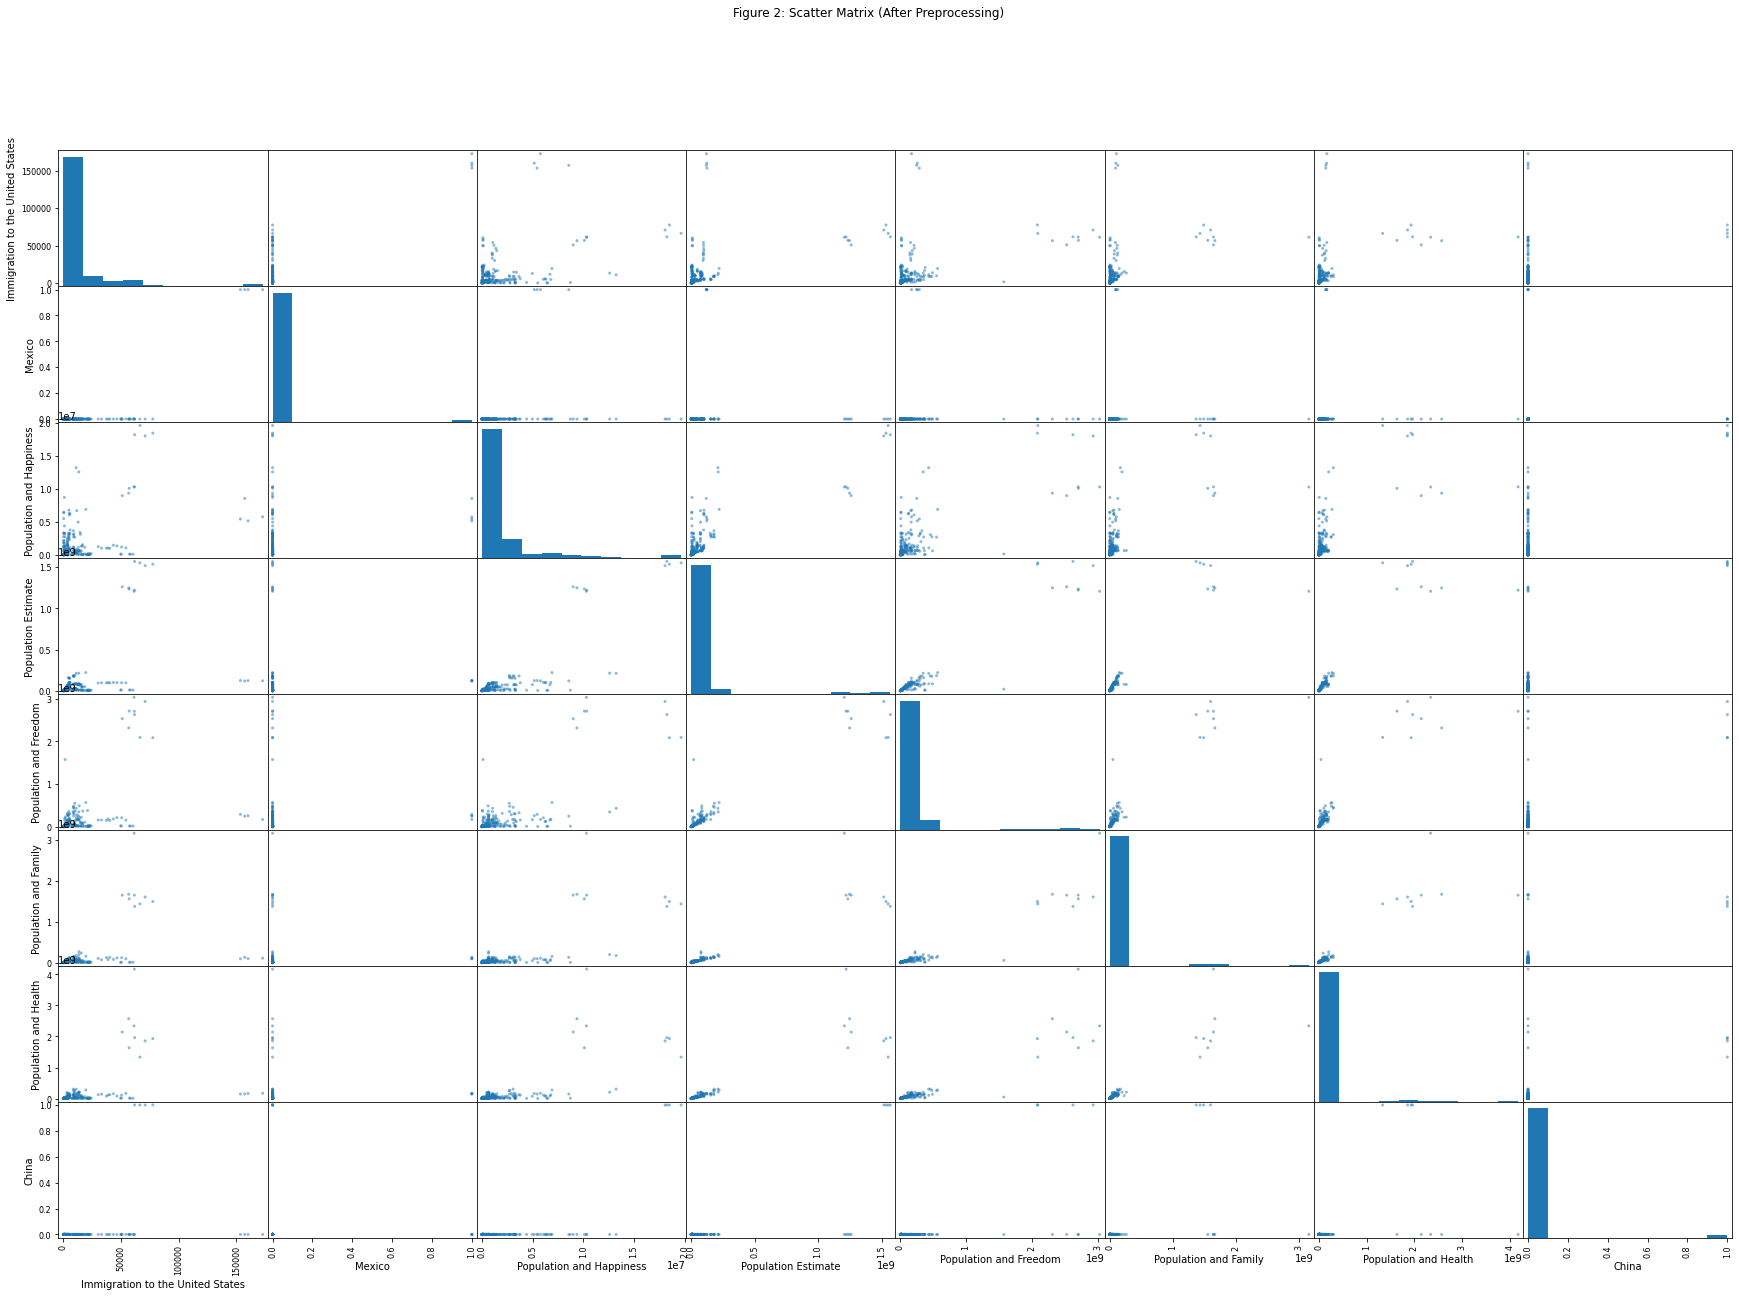

In [20]:
attributes = list(immigration_corr.head(8).keys())
scatter_matrix(df[attributes], figsize=(30, 20))
plt.suptitle("Figure 2: Scatter Matrix (After Preprocessing)")
plt.show()

### Selecting a Model

Next, I will prepare the dataset and select the Machine Learning model that best fits the provided data. 

To make the initial selection of models I would like to test, I took a look at the above two figures, specifically at the features in relation to Immigration to the United States. In practically every case, besides a scattering of outliers for a few, the plots look linear. With maybe one or two exceptions, it would be difficult to fit a polynomial function to the data better than a line. It is for that reason that I decided to test Linear Regression, LASSO, and Ridge as my models.

Before I can run the data through the different models, however, the first thing I need to do is split my data into a training and validation set. The validation set is a subset of the provided training data, meaning that it has labels. As I train the models, I use the validation set to select the most accurate or best fit model based on the provided labels. The test set should only be used in a model once to make the final prediction for the targets.

In [21]:
def split_train_validation(data, valid_ratio):
    shuffled_indices = np.random.permutation(len(data))
    valid_set_size = int(len(data) * valid_ratio)
    valid_indices = shuffled_indices[:valid_set_size]
    train_indices = shuffled_indices[valid_set_size:]
    return data.iloc[train_indices], data.iloc[valid_indices]

In [22]:
mod_train_set, validation_set = split_train_validation(df, 0.1)
print(len(mod_train_set), 'train instances and', len(validation_set), 'validation instances.')

218 train instances and 24 validation instances.


In [23]:
mod_train_labels = mod_train_set['Immigration to the United States']
validation_labels = validation_set['Immigration to the United States']
validation_labels

200    11657.0
27      4921.0
59       523.0
180     3262.0
145      400.0
64      4009.0
124    16341.0
150     4447.0
189     5808.0
123     1367.0
156      130.0
94      4814.0
114     3545.0
174     1877.0
80      8985.0
41      1133.0
57      2982.0
35     16830.0
171    13907.0
153    17362.0
108     1046.0
234      831.0
106    22833.0
121      301.0
Name: Immigration to the United States, dtype: float64

In [24]:
mod_train_features = mod_train_set.drop(columns=['Immigration to the United States'])
validation_features = validation_set.drop(columns=['Immigration to the United States'])
validation_features

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,...,Taiwan,Turkey,United Kingdom,Uruguay,Venezuela,Vietnam,Population and Family,Population and Happiness,Population and Health,Population and Freedom
200,2018,122,4.419,0.88500,1.025000,0.553000,0.312000,0.107000,0.092000,87564183,...,0,0,0,0,0,0,8.542847e+07,7.177392e+05,1.583439e+08,2.806544e+08
27,2015,60,5.791,1.12555,1.279480,0.779030,0.531220,0.042120,0.167590,46424642,...,0,0,0,0,0,0,3.628399e+07,7.737440e+05,5.959288e+07,8.739250e+07
59,2019,1,7.769,1.34000,1.587000,0.986000,0.596000,0.393000,0.153000,6487844,...,0,0,0,0,0,0,4.088118e+06,6.487844e+06,6.579963e+06,1.088564e+07
180,2015,57,5.828,0.59325,1.141840,0.743140,0.554750,0.193170,0.278150,5927054,...,0,0,0,0,0,0,5.190792e+06,1.039834e+05,7.975690e+06,1.068419e+07
145,2016,70,5.538,5.62300,0.893730,1.111110,0.582950,0.462350,0.073960,6792691,...,0,0,0,0,0,0,7.600384e+06,9.703844e+04,6.113428e+06,1.165227e+07
64,2018,19,6.814,1.30100,1.559000,0.883000,0.533000,0.272000,0.354000,7593807,...,0,0,0,0,0,0,4.870947e+06,3.996741e+05,8.600008e+06,1.424729e+07
124,2017,36,6.357,6.26198,1.070622,1.402183,0.595028,0.477487,0.149014,48908104,...,0,0,0,0,0,0,4.568194e+07,1.358558e+06,3.487997e+07,8.219464e+07
150,2016,90,5.151,5.24400,0.840580,0.385950,0.594710,0.256460,0.084040,36665026,...,0,0,0,0,0,0,4.361872e+07,4.073892e+05,9.499942e+07,6.165194e+07
189,2015,46,5.987,1.27074,1.257120,0.991110,0.496150,0.180600,0.107050,151544230,...,0,0,0,0,0,0,1.205487e+08,3.294440e+06,1.529035e+08,3.054404e+08
123,2018,79,5.358,1.15400,1.202000,0.879000,0.131000,0.044000,0.000000,13112651,...,0,0,0,0,0,0,1.090903e+07,1.659829e+05,1.491769e+07,1.000966e+08


Before passing the data to the model, I want to do one last preprocessing step, which is standardizing the values. This step will help the regression models process the data that is passed in, especially because (as we saw above with the min/max) the range for the values of the features varies a lot.

In [25]:
feature_names = mod_train_features.columns

scaler = StandardScaler().fit(mod_train_features)
mod_train_x = scaler.transform(mod_train_features)
validation_x = scaler.transform(validation_features)
mod_train_features = pd.DataFrame(mod_train_x)
validation_features = pd.DataFrame(validation_x)
mod_train_features.columns = feature_names
validation_features.columns = feature_names

test_x = scaler.transform(test_features)
test_features = pd.DataFrame(test_x)
test_features.columns = feature_names

validation_features

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,...,Taiwan,Turkey,United Kingdom,Uruguay,Venezuela,Vietnam,Population and Family,Population and Happiness,Population and Health,Population and Freedom
0,0.688774,1.571545,-1.419498,-0.819895,-0.507976,-1.181126,-1.317295,-0.792814,-0.836681,-0.025129,...,-0.096225,-0.118125,-0.136717,-0.118125,-0.096225,-0.153213,-0.057656,-0.344395,0.041776,0.159604
1,-1.406380,0.049438,-0.099022,-0.722693,0.340064,-0.387875,-0.067031,-1.133496,-0.192574,-0.177103,...,-0.096225,-0.118125,-0.136717,-0.118125,-0.096225,-0.153213,-0.195753,-0.327410,-0.171594,-0.214524
2,1.387158,-1.399018,1.804698,-0.636037,1.364858,0.338485,0.302426,0.708958,-0.316896,-0.324634,...,-0.096225,-0.118125,-0.136717,-0.118125,-0.096225,-0.153213,-0.286225,1.405564,-0.286139,-0.362631
3,-1.406380,-0.024212,-0.063411,-0.937787,-0.118614,-0.513831,0.067167,-0.340339,0.749515,-0.326706,...,-0.096225,-0.118125,-0.136717,-0.118125,-0.096225,-0.153213,-0.283126,-0.530535,-0.283123,-0.363021
4,-0.707995,0.294939,-0.342521,1.094656,-0.945427,0.777557,0.227998,1.073112,-0.990401,-0.323508,...,-0.096225,-0.118125,-0.136717,-0.118125,-0.096225,-0.153213,-0.276355,-0.532641,-0.287147,-0.361147
5,0.688774,-0.957116,0.885561,-0.651796,1.271549,-0.022993,-0.056879,0.073593,1.395838,-0.320548,...,-0.096225,-0.118125,-0.136717,-0.118125,-0.096225,-0.153213,-0.284025,-0.440858,-0.281775,-0.356123
6,-0.009611,-0.539765,0.445723,1.352857,-0.355943,1.799075,0.296882,1.152598,-0.350857,-0.167929,...,-0.096225,-0.118125,-0.136717,-0.118125,-0.096225,-0.153213,-0.169345,-0.150047,-0.224992,-0.224586
7,-0.707995,0.785941,-0.714987,0.941508,-1.122546,-1.767386,0.295068,-0.008007,-0.904509,-0.213156,...,-0.096225,-0.118125,-0.136717,-0.118125,-0.096225,-0.153213,-0.175142,-0.438518,-0.095092,-0.264354
8,-1.406380,-0.294263,0.089618,-0.664024,0.265551,0.356418,-0.267043,-0.406344,-0.708439,0.211221,...,-0.096225,-0.118125,-0.136717,-0.118125,-0.096225,-0.153213,0.041034,0.437067,0.030021,0.207586
9,0.688774,0.515890,-0.515761,-0.711197,0.081866,-0.037031,-2.349582,-1.123624,-1.620619,-0.300161,...,-0.096225,-0.118125,-0.136717,-0.118125,-0.096225,-0.153213,-0.267058,-0.511732,-0.268124,-0.189931


Now I will use the new training dataset and the validation set to train the Machine Learning model, comparing Linear, LASSO, and Ridge regression. 

#### Performance Metric: Root Mean Squared Error

To compare models, I will use Root Mean Squared Error (RMSE) as my performance metric. I chose RMSE as a metric over the other common performance metrics for linear regression models, Mean Absolute Error (MAE) and R<sup>2</sup> (goodness of fit). While R<sup>2</sup> is a good performance metric for assessing a model, the results are not as common sense and human-readable. For comparison's sake, RMSE and MAE are easier to understand and work with. While RMSE and MAE often result in very similar values, the problem with MAE is that it runs the risk of getting local minimums for the cost function. It's a little safer to use RMSE for this reason, and it can be used to train the model (in comparison to other RMSE scores) as well as quantify how good the final model is for a particular set of data in a way that is readable and follows the units of the target.

#### Linear Regression

In [26]:
linear_reg = LinearRegression()
linear_reg.fit(mod_train_features, mod_train_labels)
hypothesis = linear_reg.predict(validation_features)
hypothesis

array([11536.78448364,  3992.03263867, -1731.63916566,  2141.69106391,
         480.72572065,  6598.38456846, 17320.54228838,  5933.88862247,
        4868.70572041,  1870.18593691,  2623.10009936,  4695.58167331,
        3916.38210032,  5132.59535427,  9075.0284313 ,    43.83534812,
        3505.79245895, 17990.90697767, 10078.03036206, 20301.0381284 ,
        1484.68582364,  1306.75927117, 21800.81065855,   946.73246857])

In [27]:
linear_score = np.sqrt(mean_squared_error(validation_labels, hypothesis))
linear_score

1622.962028281784

#### LASSO Regression

In [28]:
lasso_reg = Lasso()
lasso_reg.fit(mod_train_features, mod_train_labels)
hypothesis = lasso_reg.predict(validation_features)
hypothesis

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 222146761.9181951, tolerance: 14342451.314864222
  model = cd_fast.enet_coordinate_descent(


array([11568.43249673,  3863.88523589, -1984.69600378,  2709.15929269,
         436.36541084,  6530.48800614, 17239.94231696,  6340.65149864,
        4554.23451064,  1912.72097352,  3060.22035155,  4481.77132421,
        3845.28788899,  4176.82756091,  9320.48446994,    90.64972788,
        4194.6870635 , 18137.29800073, 10158.89805751, 20752.02443511,
        1257.8716006 ,  1211.02330375, 21942.67257805,   624.94719205])

In [29]:
lasso_score = np.sqrt(mean_squared_error(validation_labels, hypothesis))
lasso_score

1651.0675745181434

#### Ridge Regression

In [30]:
ridge_reg = Ridge()
ridge_reg.fit(mod_train_features, mod_train_labels)
hypothesis = ridge_reg.predict(validation_features)
hypothesis

array([11597.48795446,  4028.58100094, -1038.27157609,  2898.36435373,
         604.42350165,  6141.21733051, 17274.50048733,  6275.72889167,
        4562.47271839,  1618.4758948 ,  2852.49490769,  4583.21501171,
        3959.43645111,  3815.52656856,  9244.63238496,   270.69901669,
        4348.79779508, 18145.86883404, 10561.35188647, 20795.15303681,
        1236.08349982,  1259.47383124, 22005.50801923,   617.78668305])

In [31]:
ridge_score = np.sqrt(mean_squared_error(validation_labels, hypothesis))
ridge_score

1494.1324848870584

#### Grid Search

The following code uses Grid Search to find the best alpha value for both Ridge and Lasso to see if the performance of the model can be improved any further.

In [32]:
params = {'alpha': [1e-3, 0.01, 0.1, 0.5, 1.0, 2.0, 3.0, 4.0, 5.0, 10.0, 15.0, 25.0, 50.0, 100.0, 150.0, 1000.0]}
ridge = Ridge()
ridge_reg_opt = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=5)
ridge_reg_opt.fit(mod_train_features, mod_train_labels)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 3.0, 4.0,
                                   5.0, 10.0, 15.0, 25.0, 50.0, 100.0, 150.0,
                                   1000.0]},
             scoring='neg_mean_squared_error')

In [33]:
np.sqrt(-1 * ridge_reg_opt.best_score_)

3934.4204486343056

In [34]:
ridge_best_hyp = ridge_reg_opt.predict(validation_features)
ridge_best_hyp

array([11597.48795446,  4028.58100094, -1038.27157609,  2898.36435373,
         604.42350165,  6141.21733051, 17274.50048733,  6275.72889167,
        4562.47271839,  1618.4758948 ,  2852.49490769,  4583.21501171,
        3959.43645111,  3815.52656856,  9244.63238496,   270.69901669,
        4348.79779508, 18145.86883404, 10561.35188647, 20795.15303681,
        1236.08349982,  1259.47383124, 22005.50801923,   617.78668305])

In [35]:
ridge_best_score = np.sqrt(mean_squared_error(validation_labels, ridge_best_hyp))
ridge_best_score

1494.1324848870584

In [36]:
ridge_best_alpha = ridge_reg_opt.best_params_
ridge_best_alpha

{'alpha': 1.0}

In [37]:
params = {'alpha': [10.0, 15.0, 25.0, 50.0, 75.0, 100.0, 125.0, 150.0, 175.0, 200.0, 1000.0], 
          'max_iter': [1000000, 10000000, 100000000]}
lasso = Lasso()
lasso_reg_opt = GridSearchCV(lasso, params, scoring='neg_mean_squared_error', cv=5)
lasso_reg_opt.fit(mod_train_features, mod_train_labels)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [10.0, 15.0, 25.0, 50.0, 75.0, 100.0, 125.0,
                                   150.0, 175.0, 200.0, 1000.0],
                         'max_iter': [1000000, 10000000, 100000000]},
             scoring='neg_mean_squared_error')

In [38]:
np.sqrt(-1 * lasso_reg_opt.best_score_)

3012.6230394286354

In [39]:
lasso_best_hyp = lasso_reg_opt.predict(validation_features)
lasso_best_hyp

array([10729.4046146 ,  3859.46797355,   393.36507402,  3547.93669692,
        1560.26081936,  3303.73313515, 16610.95238843,  5607.59454455,
        5374.50815458,  1649.12435196,  2324.76370693,  4250.57082808,
        4990.89560323,  3757.80218887,  9111.76571464,  1289.84685316,
        4431.55437797, 17308.97936083, 10718.74400347, 20420.95609677,
        1358.48558558,  1561.61796432, 21297.05708656,   954.66679019])

In [40]:
lasso_best_score = np.sqrt(mean_squared_error(validation_labels, lasso_best_hyp))
lasso_best_score

1317.9945068537543

In [41]:
lasso_best_alpha = lasso_reg_opt.best_params_
lasso_best_alpha

{'alpha': 75.0, 'max_iter': 1000000}

In [42]:
print('''RMSE Scores:
Linear Regression: {:.2f}
LASSO (default alpha): {:.2f}
Ridge (default alpha): {:.2f}'''.format(linear_score, lasso_score, ridge_score))

print('''LASSO (optimized): {:.2f} with alpha={} and max_iter={}
Ridge (optimized): {:.2f} with alpha={}'''.format(lasso_best_score, lasso_best_alpha['alpha'], lasso_best_alpha['max_iter'],
                                              ridge_best_score, ridge_best_alpha['alpha']))

RMSE Scores:
Linear Regression: 1622.96
LASSO (default alpha): 1651.07
Ridge (default alpha): 1494.13
LASSO (optimized): 1317.99 with alpha=75.0 and max_iter=1000000
Ridge (optimized): 1494.13 with alpha=1.0


The above are the RMSE scores for all of the Machine Learning models created. From running and rerunning the model, I noticed a few patterns in the RMSE scores. It looks like LASSO and Ridge, in general and more consistently, perform better than Linear Regression, even if Linear Regression may have the best score for a single run. This may be the case because Linear Regression may overfit to the training data, so for randomly selected training and validation sets LR may perform the best, or may perform the worst. Because the training dataset is relatively small, overfitting is a real risk, so I decided not to use Linear Regression for the final predictions.

For LASSO and Ridge, it is a little harder to decide which has the better performance consistently. The default parameters for LASSO do not work with the given data and produce a warning that the model does not converge, so the best three models are the default Ridge, optimized LASSO, and optimized Ridge. 

For both Ridge models, from rerunning the models, it looks like the RMSE scores tend to be on the higher side. In particular, I noticed that they are the highest for a particular run more often than the lowest. Looking at the hypotheses for these three models, optimized LASSO is the model that produces a hypothesis that has the least negative numbers (which do not make sense with our data) and provides consistently good performance (not necessarily the best RMSE score every time, but very seldom the worst). Ultimately, I chose optimized LASSO as the better performer, acknowledging that the scores are influenced by which rows are selected for the training versus validation set and that a little bit of variation with the RMSE scores is inevitable. 

### Predicting the Test Set

The test set has already been fully preprocessed along with the training data in the preprocessing section above, so test_features can be passed directly to the chosen model.

This means test_features has all of the added and modified features and has been scaled like the training set:

In [43]:
test_features

,Year,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Population Estimate,...,Taiwan,Turkey,United Kingdom,Uruguay,Venezuela,Vietnam,Population and Family,Population and Happiness,Population and Health,Population and Freedom
0,-1.406380,-0.637965,0.568916,-0.748510,0.104860,-0.273571,0.345884,-0.065137,0.359677,-0.333835,...,-0.096225,-0.118125,-0.136717,8.465617,-0.096225,-0.153213,-0.288421,-0.524189,-0.289715,-0.370885
1,-0.009611,-0.883466,0.713283,1.467032,-0.233539,1.901283,0.419641,0.942383,-0.237225,0.451463,...,-0.096225,-0.118125,-0.136717,-0.118125,-0.096225,-0.153213,0.251878,2.423554,0.026589,0.296311
2,1.387158,-0.441564,0.277295,-0.690184,0.868323,-0.019484,-0.342041,-1.092118,-0.623654,-0.169361,...,-0.096225,-0.118125,-0.136717,-0.118125,-0.096225,-0.153213,-0.202897,-0.194189,-0.181762,-0.189234
3,-0.707995,-0.515214,0.449573,1.422368,0.550175,0.841921,1.916215,0.616804,-1.097681,-0.169036,...,-0.096225,-0.118125,-0.136717,-0.118125,-0.096225,-0.153213,-0.195971,-0.163641,-0.207367,-0.276647
4,-0.009611,1.154193,-1.135576,0.691099,-0.053234,1.912069,0.942430,0.164076,-0.656224,-0.313124,...,-0.096225,-0.118125,-0.136717,-0.118125,-0.096225,-0.153213,-0.274477,-0.534332,-0.285890,-0.357453
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,1.387158,0.859592,-0.676490,-0.761707,-0.174732,0.012102,-0.125318,-0.829571,-1.126397,5.506316,...,-0.096225,-0.118125,-0.136717,-0.118125,-0.096225,-0.153213,3.661134,4.606507,3.534524,5.505363
57,-0.009611,-1.178067,1.337911,1.736482,1.022999,2.177606,1.716184,1.804346,2.449888,-0.262147,...,-0.096225,-0.118125,-0.136717,-0.118125,-0.096225,-0.153213,-0.253409,0.147702,-0.266869,-0.330017
58,0.688774,1.178743,-1.142314,-0.749585,-1.354418,-0.696816,-0.478919,-0.677293,0.782322,-0.058337,...,-0.096225,-0.118125,-0.136717,-0.118125,-0.096225,-0.153213,-0.011335,-0.337259,-0.054661,-0.052311
59,-0.707995,-0.196063,0.079993,1.269624,0.591564,0.533858,1.756867,-0.366069,-1.402820,-0.089596,...,-0.096225,-0.118125,-0.136717,-0.118125,-0.096225,-0.153213,-0.152306,-0.136795,-0.154925,-0.224215


Below, I use the optimized LASSO model to make a prediction based on the test features and added the results to `ds1.csv`.

In [44]:
final_hypothesis = lasso_reg_opt.predict(test_features)
final_hypothesis

array([  1064.83869687,  13975.81506892,   3542.05301811,   4134.56389918,
         2171.12371052,   3120.01720325,   2113.67158117,  12558.42170165,
         1042.89424219,   4028.28090273,   9578.40426058,   2088.0445778 ,
        13203.99806668,   3999.28802242,   9837.13129411,   3292.35187097,
         3494.74985993,  12492.34087132,   3732.18180202,  10037.57101142,
         2592.27906111,   2522.13487022,   1684.00751356,   2100.95116699,
        12176.08739487,   2611.50044715,   5360.83474009,   1316.39672026,
        14223.57366185,   4153.91591746,  16430.85178483,   1126.8725598 ,
         1160.65356266,   2879.18662553,   1806.61049336,   8815.38934751,
         9703.88211696,    983.85220006,   1551.55147986,   6491.37591158,
        48164.95602761,   1186.27849353,    931.07818008,   1657.89787423,
         4236.18906635,   1318.38783106,   2482.38359455,   4695.91416038,
       160594.1662155 ,   2607.74695388,  10503.86875916,   1270.66765404,
         2669.02965813,  

In [46]:
pd.DataFrame(final_hypothesis).to_csv('dc1.csv', index=False)